#Cross-Graph Data Analysis

This notebook contains code to analyze the combined data from all 32 semantic graphs learned by both Gemini models.

###Imports

In [ ]:
import pandas as pd
import numpy as np
import sys
from google.colab import drive
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

###Load Data

In [ ]:
df = pd.read_csv('data/combined_graph_data.csv')

###Perform t-test Comparing the Hallucination Rates of the Two Models

In [ ]:
# Group data by model
model1_data = df[df['model'] == 'gemini-1.5-pro-001']['hallucination_rate']
model2_data = df[df['model'] == 'gemini-1.5-flash-001']['hallucination_rate']

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(model1_data, model2_data)


print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -18.693469424406075
P-value: 8.377892965406429e-12


###Perform t-test Comparing the Maximum Path Length of the Two Models

In [ ]:
# Group data by model
model1_data = df[df['model'] == 'gemini-1.5-pro-001']['max_path']
model2_data = df[df['model'] == 'gemini-1.5-flash-001']['max_path']

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(model1_data, model2_data)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: 21.74734512227986
P-value: 9.343811491519248e-13


###Perform t-test Comparing the Log-Likelihood of the Hutchinson et al. Data According to the Two Models

In [ ]:
# Group data by model
model1_data = df[df['model'] == 'gemini-1.5-pro-001']['log_likelihood']
model2_data = df[df['model'] == 'gemini-1.5-flash-001']['log_likelihood']

#Check if the data is paired
if len(model1_data) != len(model2_data):
    print("Warning: Data lengths are different.  Using independent samples t-test.")
    t_statistic, p_value = stats.ttest_ind(model1_data, model2_data)
else:
    t_statistic, p_value = stats.ttest_rel(model1_data, model2_data)


print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
T-statistic: -13.629929259565532
P-value: 7.444639098607156e-10


###Generate Figure Comparing the Maximum Path Length and the Fully-Connected Status of Each Graph

<Figure size 1000x600 with 0 Axes>

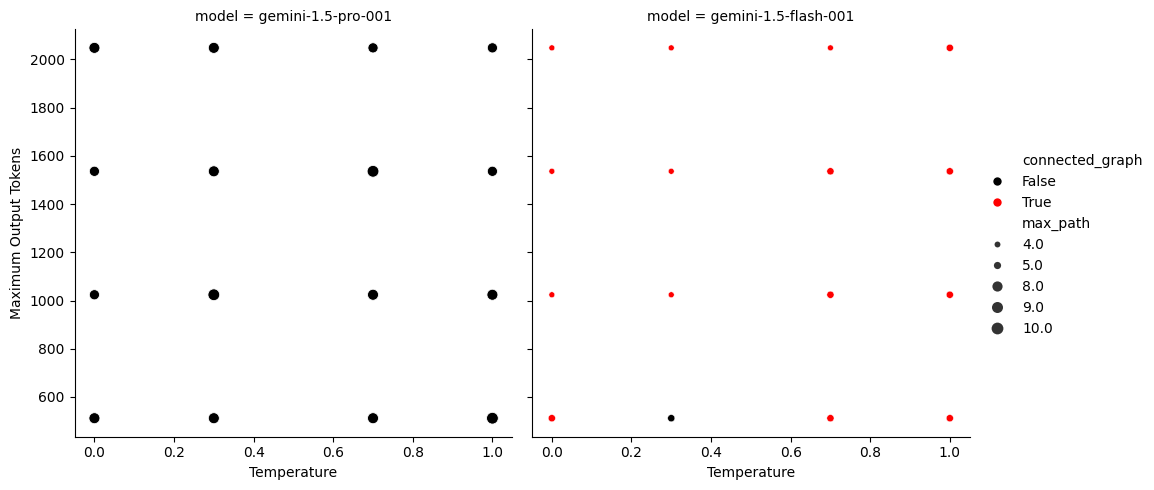

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.relplot(data=df, x='temperature', y='maxout', size='max_path',
            col='model', hue='connected_graph', palette=['black', 'red'],
            kind='scatter')
ax.set_xlabels('Temperature')
ax.set_ylabels('Maximum Output Tokens')
plt.show()

###Generate Box Plot Comparing the Log-Likelihood Rate of the Two Models

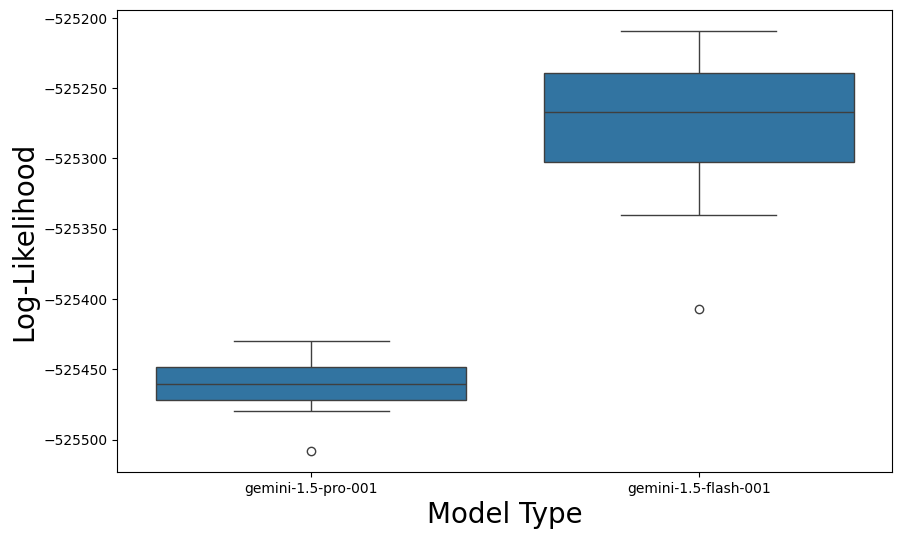

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='model', y='log_likelihood', data=df)
plt.xlabel('Model Type',fontsize=20)
plt.ylabel('Log-Likelihood',fontsize=20)
plt.show()